In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\2016-2017.csv',encoding='cp1252', dtype='str', error_bad_lines=False)
df.shape

(7342, 4)

In [4]:
df1 = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\2014-2015.csv',encoding='cp1252', dtype='str', error_bad_lines=False)
df1.shape

(17200, 4)

In [5]:
df2 = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\2012-2013.csv',encoding='cp1252', dtype='str', error_bad_lines=False)
df2.shape

(13148, 4)

In [6]:
df3 = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\2010-2011.csv',encoding='cp1252', dtype='str', error_bad_lines=False)
df3.shape

(15247, 4)

In [7]:
df4 = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\2008-2009.csv',encoding='cp1252', dtype='str', error_bad_lines=False)
df4.shape

(13523, 4)

In [8]:
df5 = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\1986-2007.csv',encoding='cp1252', dtype='str', error_bad_lines=False)
df5.shape

(18646, 4)

In [9]:
frames = [df,df1,df2,df3,df4,df5]

In [10]:
publications = pd.concat(frames)

In [11]:
publications.shape

(85106, 4)

In [3]:
publications.to_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\publications.csv', index=False)

NameError: name 'publications' is not defined

In [4]:
publication_data = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\publications.csv',encoding='cp1252', dtype='str', error_bad_lines=False)
publication_data.shape

(85106, 4)

In [7]:
publication_data=publication_data['publication_type'].value_counts()

In [15]:
list(df)

[5992, 720, 582, 37, 8]

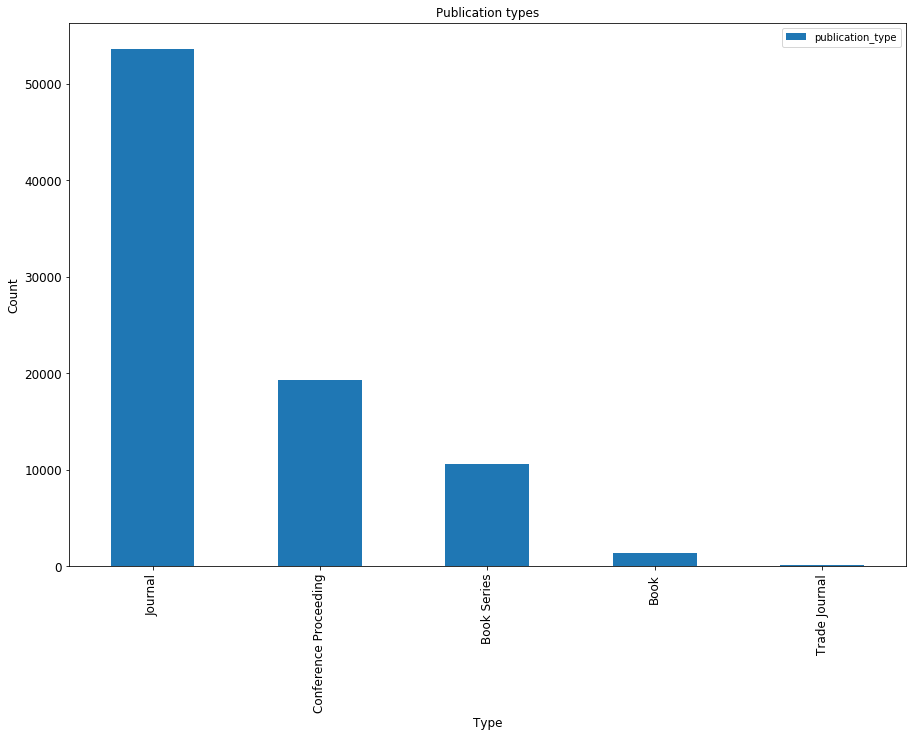

In [8]:
import matplotlib.pyplot as plt
ax = publication_data.plot(kind='bar', title ="Publication types", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [3]:
author = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\Other files\authorAffil_10_11.csv',encoding='cp1252', dtype='str', error_bad_lines=False)


In [5]:
author.dropna(how='any', inplace=True)

In [4]:
del author['Affiliation ID']

In [6]:
author1=author.groupby('eid')['Author ID'].nunique().sort_values()

In [7]:
author1.shape

(14960,)

In [8]:
author1=author1.reset_index()

In [9]:
author1.head()

,eid,Author ID
0,2-s2.0-79951767091,1
1,2-s2.0-79960536112,1
2,2-s2.0-79960537397,1
3,2-s2.0-77954911832,1
4,2-s2.0-79960537822,1


In [10]:
list(author1)

['eid', 'Author ID']

In [12]:
citation = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\MergedData\2010-2011_merged.csv',encoding='cp1252', dtype='str', error_bad_lines=False)


In [13]:
citation.shape

(15247, 12)

In [14]:
final= author1.merge(citation, on='eid')

In [28]:
final.shape

(7139, 13)

In [15]:
final.tail()

,eid,Author ID,cite,Lang,Para,Title,year,publication_name,publication_type,Author Keyword,Abbreviation,Code,Text
14955,2-s2.0-79953755048,69,85,eng,The origin of the epidemic of IgE-associated (...,MeDALL (Mechanisms of the Development of ALLer...,2011,Allergy: European Journal of Allergy and Clini...,Journal,"['allergy', 'early diagnosis', 'epigenetics', ...",EART,1908,Geophysics
14956,2-s2.0-80054973816,70,0,eng,The origin of the epidemic of IgE-associated (...,MeDALL (Mechanisms of the Development of ALLer...,2011,Alergia Astma Immunologia,Journal,"['Allergy', 'Early diagnosis', 'Epigenetics', ...",MEDI,2718,Health Informatics
14957,2-s2.0-77955373370,82,56,eng,Genotypic algorithms for prediction of HIV-1 c...,Evaluation of the genotypic prediction of HIV-...,2010,Antimicrobial Agents and Chemotherapy,Journal,NaN,BIOC,1300,"Biochemistry, Genetics and Molecular Biology (..."
14958,2-s2.0-78651319979,126,449,eng,The primary mission of Universal Protein Resou...,Ongoing and future developments at the Univers...,2011,Nucleic Acids Research,Journal,NaN,AGRI,1110,Plant Science
14959,2-s2.0-79958143783,143,35,eng,"{'sup': ['2', '2', '-4', '-4'], '#text': 'We c...",GWA study data mining and independent replicat...,2011,Molecular Psychiatry,Journal,"['association study', 'cardiomyopathy', 'GWA d...",HEAL,3605,Health Information Management


In [16]:
list(final)

['eid',
 'Author ID',
 'cite',
 'Lang',
 'Para',
 'Title',
 'year',
 'publication_name',
 'publication_type',
 'Author Keyword',
 'Abbreviation',
 'Code',
 'Text']

In [34]:
final[['Author ID','cite']].corr()

,Author ID
Author ID,1.0


In [17]:
df=final['cite']
final['citation']=df.astype(str).astype(int)

In [18]:
list(final)

['eid',
 'Author ID',
 'cite',
 'Lang',
 'Para',
 'Title',
 'year',
 'publication_name',
 'publication_type',
 'Author Keyword',
 'Abbreviation',
 'Code',
 'Text',
 'citation']

In [19]:
final[['Author ID','citation']].corr()

,Author ID,citation
Author ID,1.000000,0.040476
citation,0.040476,1.000000


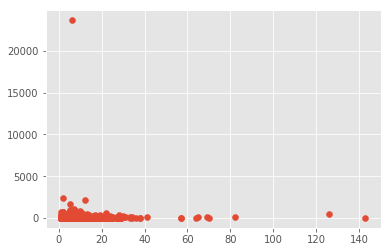

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.scatter(final['Author ID'], final['citation'])
plt.show()

In [ ]:
 final.loc[final['citation'].idxmax()]

In [ ]:
ff = pd.DataFrame()


In [21]:
final = final[final['citation']<= 5000]

In [22]:
final=final[final['Author ID']<= 100]

In [23]:
final.tail()

,eid,Author ID,cite,Lang,Para,Title,year,publication_name,publication_type,Author Keyword,Abbreviation,Code,Text,citation
14953,2-s2.0-78049259570,64,38,eng,The Pleiades Promoter Project integrates genom...,A regulatory toolbox of MiniPromoters to drive...,2010,Proceedings of the National Academy of Science...,Journal,"['Knockin mice', 'Neuroscience', 'Promoter des...",COMP,1700,Computer Science (all),38
14954,2-s2.0-84858593012,65,155,eng,The iPlant Collaborative (iPlant) is a United ...,The iPlant collaborative: Cyberinfrastructure ...,2014,Frontiers in Plant Science,Journal,"['Bioinformatics', 'Computational biology', 'C...",AGRI,1101,Agricultural and Biological Sciences (miscella...,155
14955,2-s2.0-79953755048,69,85,eng,The origin of the epidemic of IgE-associated (...,MeDALL (Mechanisms of the Development of ALLer...,2011,Allergy: European Journal of Allergy and Clini...,Journal,"['allergy', 'early diagnosis', 'epigenetics', ...",EART,1908,Geophysics,85
14956,2-s2.0-80054973816,70,0,eng,The origin of the epidemic of IgE-associated (...,MeDALL (Mechanisms of the Development of ALLer...,2011,Alergia Astma Immunologia,Journal,"['Allergy', 'Early diagnosis', 'Epigenetics', ...",MEDI,2718,Health Informatics,0
14957,2-s2.0-77955373370,82,56,eng,Genotypic algorithms for prediction of HIV-1 c...,Evaluation of the genotypic prediction of HIV-...,2010,Antimicrobial Agents and Chemotherapy,Journal,NaN,BIOC,1300,"Biochemistry, Genetics and Molecular Biology (...",56


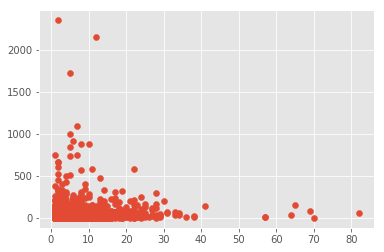

In [24]:
plt.scatter(final['Author ID'], final['citation'])
plt.show()

In [27]:
final=final[final['Author ID']<= 50]
final = final[final['citation']<= 800]

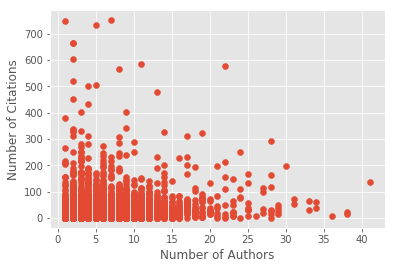

In [28]:
plt.scatter(final['Author ID'], final['citation'])
plt.xlabel('Number of Authors')
plt.ylabel('Number of Citations')
plt.show()

In [85]:
final.shape

(7093, 14)

C:\Users\Mouna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=90).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


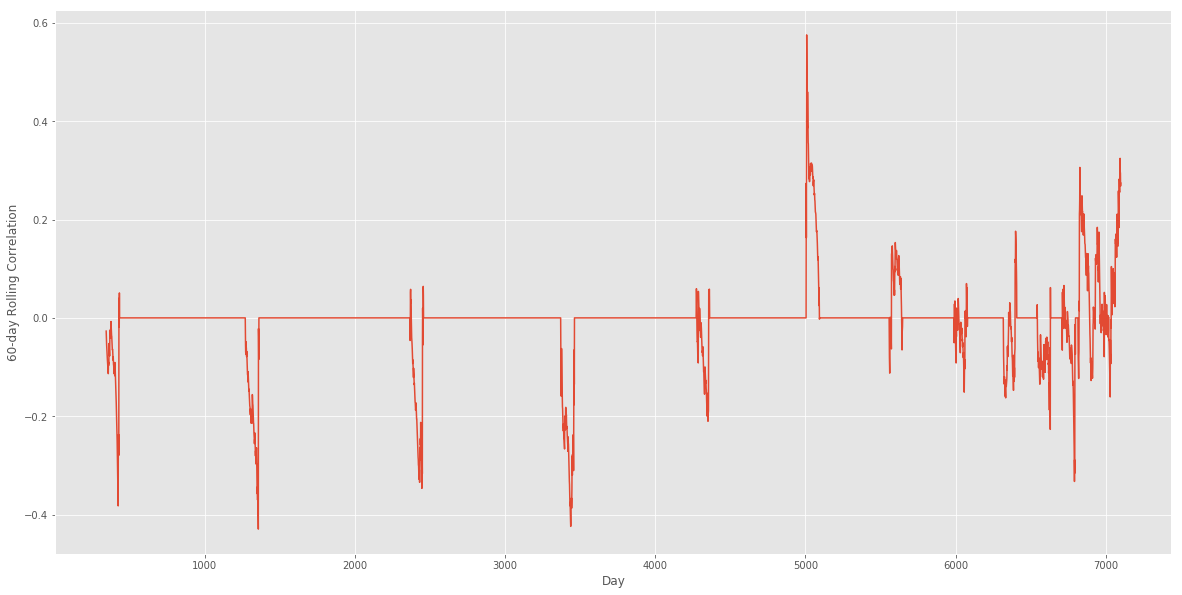

In [87]:
rolling_correlation = pd.rolling_corr(final['Author ID'], final['citation'], 90)
plt.figure(figsize=(20,10))
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')
plt.show()